In [1]:
!pip install deap

In [0]:
from deap import base
from deap import creator
from deap import tools

import random
import array
import numpy as np
import matplotlib.pyplot as plt

import vrp
import elitism

In [0]:
TSP_NAME = "bayg29"
NUM_OF_VEHICLES = 3
DEPOT_LOCATION = 12
vrp = vrp.VehicleRoutingProblem(TSP_NAME, NUM_OF_VEHICLES, DEPOT_LOCATION)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
POPULATION_SIZE = 500
P_CROSSOVER = 0.9 
P_MUTATION = 0.2  
MAX_GENERATIONS = 1000
HALL_OF_FAME_SIZE = 30

In [0]:
def vrpDistance(individual):
    return vrp.getMaxDistance(individual),  # return a tuple

toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox.register("randomOrder", random.sample, range(len(vrp)), len(vrp))
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("evaluate", vrpDistance)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(vrp))
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(vrp))

In [5]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)

best = hof.items[0]
print("Best Ever Individual = ", best)
print("Best Ever Fitness = ", best.fitness.values[0])

Best Ever Individual =  array('i', [0, 20, 17, 16, 13, 21, 10, 14, 3, 29, 15, 23, 7, 26, 12, 22, 6, 24, 18, 9, 19, 30, 27, 11, 5, 4, 8, 25, 2, 28, 1])
Best Ever Fitness =  3857.36376953125


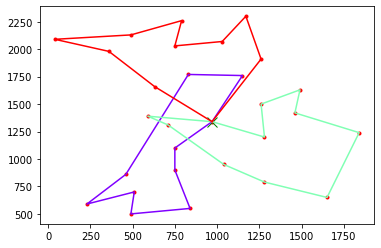

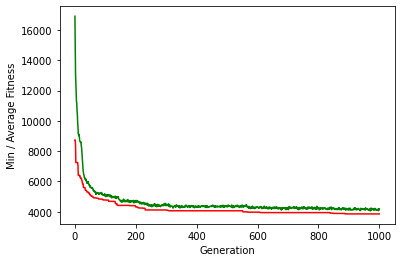

In [6]:
plt.figure(1)
vrp.plotData(best)

minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
plt.figure(2)
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')

plt.show()